First few rows of the dataset:
      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90
Training R^2 score: 0.99
Testing R^2 score: 0.96
Generating summary plot...


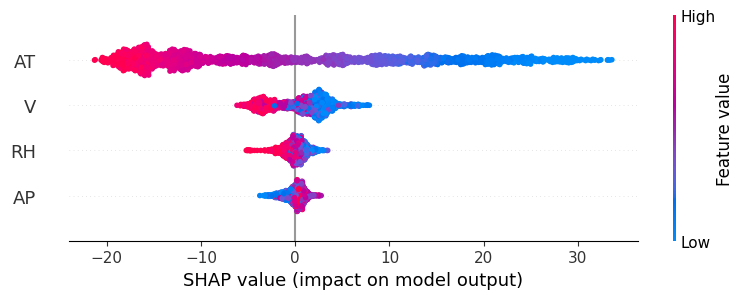

Generating force plot for instance index 19...


Generating detailed SHAP summary plot...


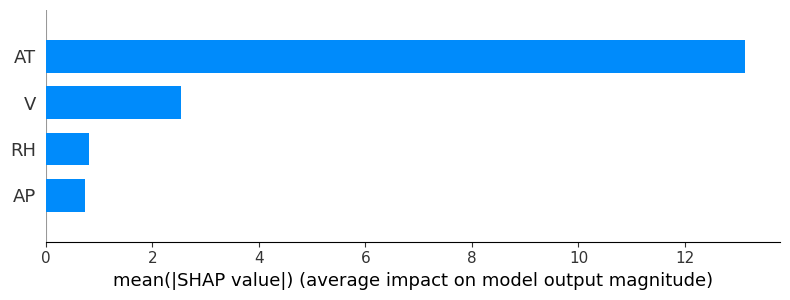

Generating SHAP dependence plot for feature: AT...


<Figure size 640x480 with 0 Axes>

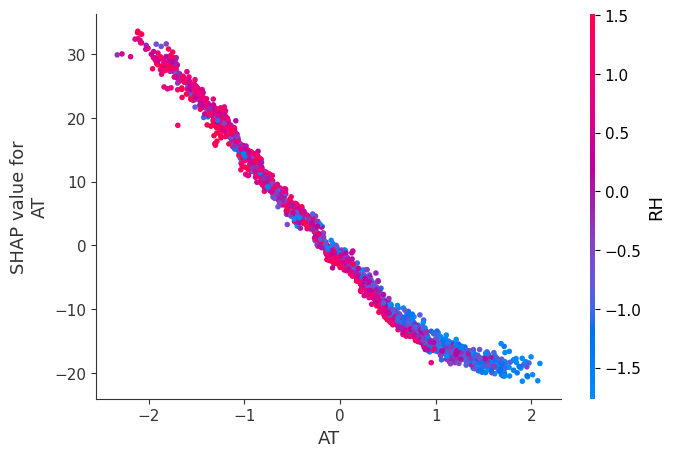

Generating SHAP dependence plot for feature: V...


<Figure size 640x480 with 0 Axes>

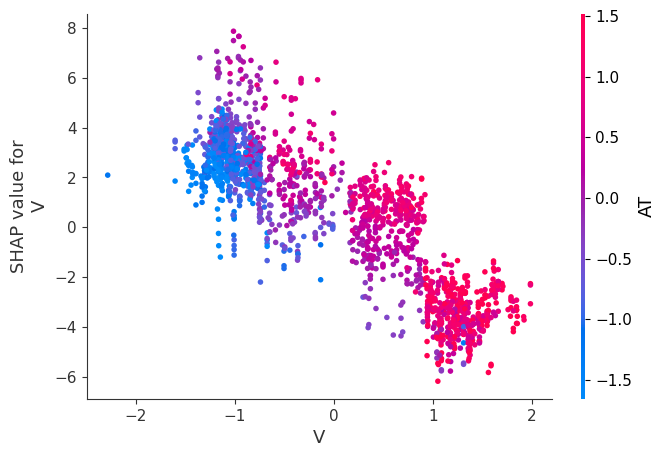

Generating SHAP dependence plot for feature: AP...


<Figure size 640x480 with 0 Axes>

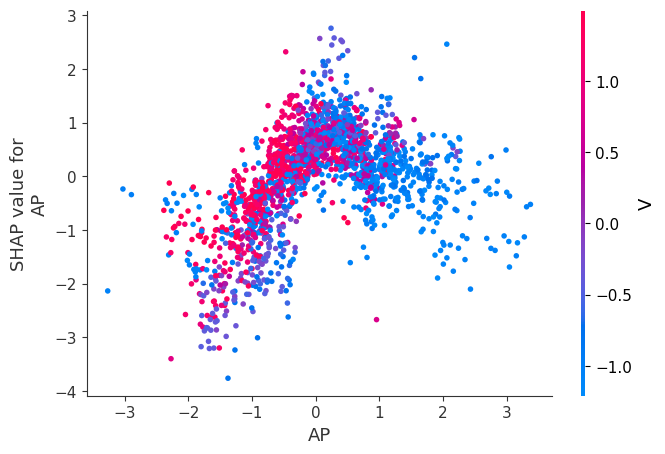

Generating SHAP dependence plot for feature: RH...


<Figure size 640x480 with 0 Axes>

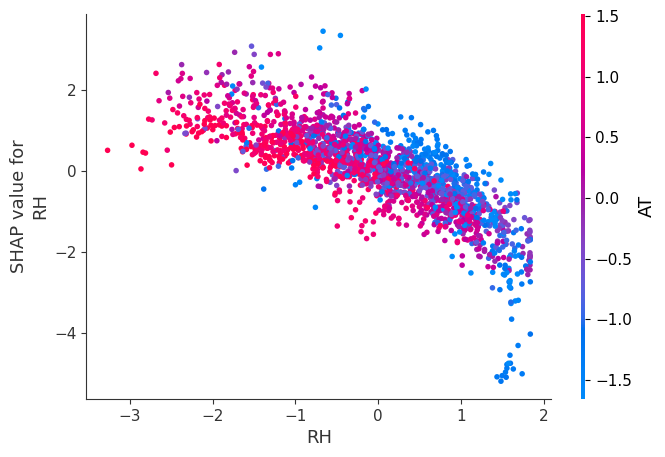

Key Actionable Inferences:
1. Increase in Ambient Air temperature (AT) decreases the performance of a Power Plant. There is an inverse relationship between both.
   - Mitigation: Evaporative cooling, inlet air fogging, and thermal energy storage can help reduce the adverse effects of high AT.

2. Increase in Relative Humidity (RH) decreases the performance of a Power Plant. There is an inverse relationship between both.
   - Mitigation: Using air dryers and improving heat transfer surface efficiency can mitigate the impact of high RH.

3. Increase in vacuum pressure (VP) decreases the performance of a Power Plant. There is an inverse relationship between both.
   - Mitigation: Keeping the cooling water temperature low, maintaining the vacuum pump, and minimizing air leaks can help maintain optimal vacuum pressure.
All plots generated successfully.


<Figure size 640x480 with 0 Axes>

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import shap
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Load the dataset
file_path = 'Folds5x2_pp.xlsx' 
data = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(data.head())

# Splitting the dataset into features (X) and target variable (y)
X = data[['AT', 'V', 'AP', 'RH']]
y = data['PE']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Regressor
rf = RandomForestRegressor(max_depth=15, random_state=42, n_estimators=60)
rf.fit(X_train_scaled, y_train)

# Display the model's performance
train_score = rf.score(X_train_scaled, y_train)
test_score = rf.score(X_test_scaled, y_test)
print(f"Training R^2 score: {train_score:.2f}")
print(f"Testing R^2 score: {test_score:.2f}")

# Use SHAP values for explainability
# We'll use TreeExplainer as it is optimized for tree-based models like RandomForest
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test_scaled)

# Generate summary plot
print("Generating summary plot...")
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns.tolist())
plt.savefig("summary_plot.png")  # Save the plot

# Generate individual force plot for a specific instance
instance_index = 19  # Change the index to any value you want to analyze
instance = X_test.iloc[[instance_index]]
instance_scaled = scaler.transform(instance)
shap_value_instance = explainer.shap_values(instance_scaled)

print(f"Generating force plot for instance index {instance_index}...")
force_plot = shap.force_plot(explainer.expected_value[0], shap_value_instance[0], instance_scaled[0], feature_names=X.columns.tolist())

# Save the force plot to an HTML file
shap.save_html("force_plot_instance.html", force_plot)

# Display the force plot
shap.initjs()
display(force_plot)

# Global Interpretability: Detailed Plots
# SHAP Summary Plot
print("Generating detailed SHAP summary plot...")
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns.tolist(), plot_type='bar')
plt.savefig("detailed_summary_plot.png")  # Save the plot

# SHAP Dependence Plot for each feature
for feature in X.columns:
    print(f"Generating SHAP dependence plot for feature: {feature}...")
    shap.dependence_plot(feature, shap_values, X_test_scaled, feature_names=X.columns.tolist())
    plt.savefig(f"dependence_plot_{feature}.png")  # Save the plot

# Key Actionable Inferences derived from using Explainable AI through Shapley Values
def actionable_inferences():
    print("Key Actionable Inferences:")
    print("1. Increase in Ambient Air temperature (AT) decreases the performance of a Power Plant. There is an inverse relationship between both.")
    print("   - Mitigation: Evaporative cooling, inlet air fogging, and thermal energy storage can help reduce the adverse effects of high AT.")
    print()
    print("2. Increase in Relative Humidity (RH) decreases the performance of a Power Plant. There is an inverse relationship between both.")
    print("   - Mitigation: Using air dryers and improving heat transfer surface efficiency can mitigate the impact of high RH.")
    print()
    print("3. Increase in vacuum pressure (VP) decreases the performance of a Power Plant. There is an inverse relationship between both.")
    print("   - Mitigation: Keeping the cooling water temperature low, maintaining the vacuum pump, and minimizing air leaks can help maintain optimal vacuum pressure.")
    
actionable_inferences()

print("All plots generated successfully.")
